# The code sniffet for  training the nlp models and chatbot model

## Installing the tansformer module

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.7 MB/s eta 0:00:00


## The link to our emotion dataset for the language processing

In [ ]:
!git clone https://github.com/Jcharis/end2end-nlp-project.git

Cloning into 'end2end-nlp-project'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 1), reused 17 (delta 1), pack-reused 0
Receiving objects: 100% (20/20), 4.72 MiB | 23.91 MiB/s, done.
Resolving deltas: 100% (1/1), done.


## Importing the required modules

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input , LSTM , Dense , GlobalMaxPooling2D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from transformers import AutoTokenizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report


## Creating dataframe from the csv file and visualising it .

<ipython-input-10-09303025dcd6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(sampled_rows)
<ipython-input-10-09303025dcd6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(sampled_rows)
<ipython-input-10-09303025dcd6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(sampled_rows)
<ipython-input-10-09303025dcd6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(sampled_rows)
<ipython-input-10-09303025dcd6>:11: FutureWarning: The frame.append method is deprecated and wil

<Axes: >

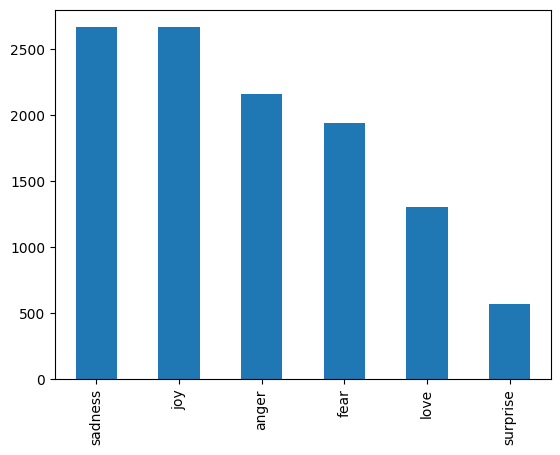

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive (3)/train_csv.csv")

target_frequency = df['Emotions'].value_counts().mean()

undersampled_df = pd.DataFrame(columns=['Emotions', 'Text'])

for emotion in df['Emotions'].unique():
    emotion_data = df[df['Emotions'] == emotion]
    num_samples = min(int(target_frequency), len(emotion_data))
    sampled_rows = emotion_data.sample(n=num_samples, random_state=42)
    undersampled_df = undersampled_df.append(sampled_rows)

# Shuffling the undersampled DataFrame

result_df = undersampled_df.sample(frac=1, random_state=42)



xfeatures = result_df['Text']
ylables = result_df['Emotions']


undersampled_df['Emotions'].value_counts().plot(kind = "bar")




## Vectorisaton of text

In [ ]:
#vectorization of emotion classifier
cv = CountVectorizer()
x4 = cv.fit_transform(xfeatures)


## Spliting the dataset into
  * training and testing dataset

In [ ]:
x1_train , x1_test , y1_train , y1_test = train_test_split(x4 , ylables , test_size = 0.1 , random_state = 42)

In [ ]:
x1_train.shape ,y1_train.shape

((10173, 12683), (10173,))

## Function for making the prediction

In [ ]:
def predict_emotion(text , model):
  myvect = cv.transform(text).toarray()
  prediction = model.predict(myvect)
  #print(prediction,"\n")
  pred_prob = (model.predict_proba(myvect))
  #print(pred_prob,"\n")
  pred_percentage_for_all = dict(zip(model.classes_,pred_prob[0]))
  return prediction[0]

# Creating the ensemble model and testng it




In [ ]:
lr  = LogisticRegression(penalty = 'l1',
                        solver = 'saga',
                        max_iter = 50)
nv = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=100,
                             random_state=1,
                             max_depth = None,
                             min_samples_split = 5,
                             min_samples_leaf = 2)
vc_h = VotingClassifier(estimators=[('lr',lr),('Nv', nv),("rfc",rfc)] , voting = 'soft')
vc_h.fit(x1_train, y1_train)

y_pred_vc = vc_h.predict(x1_test)

#accuracy
vc_h.score(x1_test,y1_test)

print(predict_emotion(["this is energitic"],vc_h))

In [ ]:
vc_h.score(x1_test,y1_test)

0.865605658709107

              precision    recall  f1-score   support

       anger       0.92      0.83      0.87       212
        fear       0.86      0.90      0.88       189
         joy       0.89      0.89      0.89       278
        love       0.84      0.81      0.82       134
     sadness       0.81      0.94      0.87       260
    surprise       0.97      0.59      0.73        58

    accuracy                           0.87      1131
   macro avg       0.88      0.82      0.84      1131
weighted avg       0.87      0.87      0.86      1131



ValueError: ignored

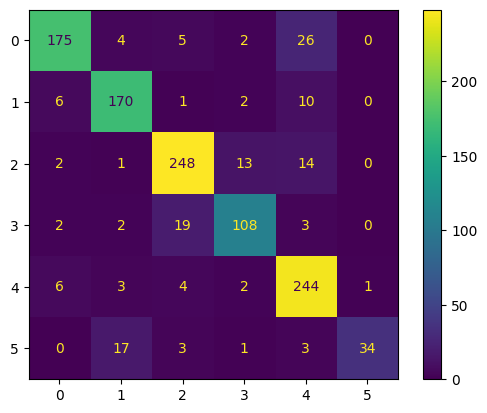

In [ ]:
# Model visualisation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y1_test , y_pred_vc))
c_m_deci = confusion_matrix(y1_test , y_pred_vc)
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_deci , display_labels = y1_test)
disp.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

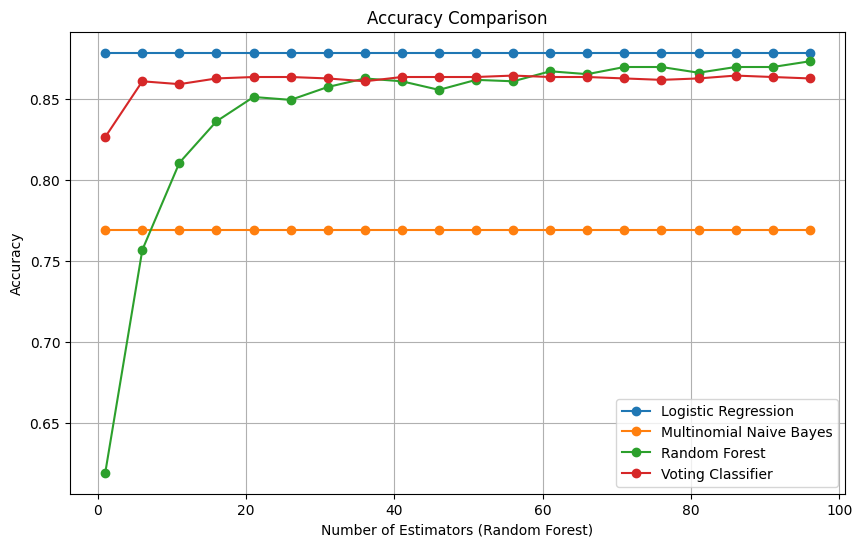

In [ ]:

logreg_classifier = LogisticRegression(random_state=42 )
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(random_state=42)

# Create the Voting Classifier

voting_classifier = VotingClassifier(
    estimators=[
        ('logreg', logreg_classifier),
        ('nb', nb_classifier),
        ('rf', rf_classifier)
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

# Lists to store accuracy scores
logreg_scores = []
nb_scores = []
rf_scores = []
voting_scores = []

# Vary a parameter (e.g., number of trees for Random Forest)
n_estimators_values = np.arange(1, 101, 5)

for n_estimators in n_estimators_values:
    # Set the parameter for the Random Forest classifier
    rf_classifier.set_params(n_estimators=n_estimators)

    # Fit the individual models and the Voting Classifier
    logreg_classifier.fit(x1_train, y1_train)
    nb_classifier.fit(x1_train, y1_train)
    rf_classifier.fit(x1_train, y1_train)
    voting_classifier.fit(x1_train, y1_train)

    # Make predictions
    logreg_preds = logreg_classifier.predict(x1_test)
    nb_preds = nb_classifier.predict(x1_test)
    rf_preds = rf_classifier.predict(x1_test)
    voting_preds = voting_classifier.predict(x1_test)

    # Calculate accuracy scores
    logreg_accuracy = accuracy_score(y1_test, logreg_preds)
    nb_accuracy = accuracy_score(y1_test, nb_preds)
    rf_accuracy = accuracy_score(y1_test, rf_preds)
    voting_accuracy = accuracy_score(y1_test, voting_preds)

    # Store the accuracy scores
    logreg_scores.append(logreg_accuracy)
    nb_scores.append(nb_accuracy)
    rf_scores.append(rf_accuracy)
    voting_scores.append(voting_accuracy)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, logreg_scores, label='Logistic Regression', marker='o')
plt.plot(n_estimators_values, nb_scores, label='Multinomial Naive Bayes', marker='o')
plt.plot(n_estimators_values, rf_scores, label='Random Forest', marker='o')
plt.plot(n_estimators_values, voting_scores, label='Voting Classifier', marker='o')
plt.xlabel('Number of Estimators (Random Forest)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()


# Creating the random forest model and testng it

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,
                             random_state=1,
                             max_depth = None,
                             min_samples_split = 5,
                             min_samples_leaf = 2)
rfc.fit(x1_train,y1_train)
y_pred_rfc = rfc.predict(x1_test)
#accuracy
rfc.score(x1_test,y1_test)

0.8753315649867374

In [ ]:
print(predict_emotion(["i am angry"],rfc))

anger


## Creating a graph for the model accuracy

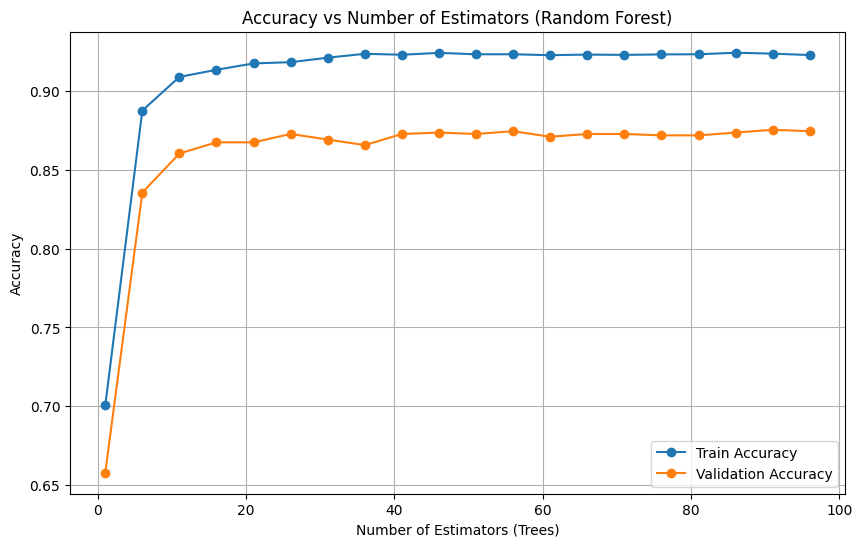

In [ ]:


# Create lists to store accuracy scores
train_scores = []
val_scores = []

# Vary the number of estimators (trees) for the RandomForestClassifier
estimator_values = np.arange(1, 101, 5)  # Change the step size as needed

for n_estimators in estimator_values:
    # Create and train the model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42 ,max_depth = None,
                             min_samples_split = 5,
                             min_samples_leaf = 2 )
    model.fit(x1_train, y1_train)

    # Calculate accuracy on training set
    train_accuracy = model.score(x1_train, y1_train)
    train_scores.append(train_accuracy)

    # Calculate accuracy on validation set
    val_accuracy = model.score(x1_test, y1_test)
    val_scores.append(val_accuracy)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(estimator_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(estimator_values, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


              precision    recall  f1-score   support

       anger       0.93      0.83      0.87       212
        fear       0.85      0.91      0.88       189
         joy       0.88      0.88      0.88       278
        love       0.84      0.91      0.87       134
     sadness       0.86      0.91      0.89       260
    surprise       0.87      0.67      0.76        58

    accuracy                           0.88      1131
   macro avg       0.87      0.85      0.86      1131
weighted avg       0.88      0.88      0.87      1131



ValueError: ignored

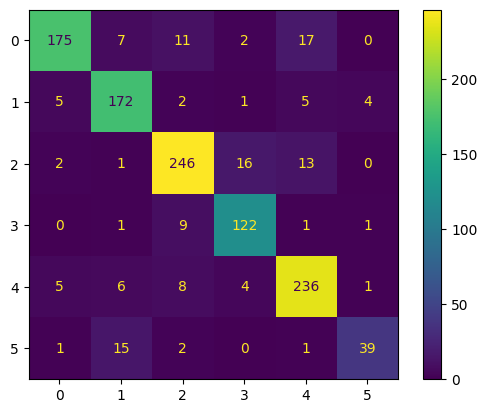

In [ ]:
print(classification_report(y1_test , y_pred_rfc))
c_m_deci = confusion_matrix(y1_test , y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_deci , display_labels = y1_test)
disp.plot()

# Creating the logistic regression model and testng it

In [ ]:
lr  = LogisticRegression(penalty = 'l1',
                        solver = 'saga',
                        max_iter = 50)
lr.fit(x1_train , y1_train)
y_pred_lr = lr.predict(x1_test)
#accuracy
print("The accuracy is ",lr.score(x1_test,y1_test))


The accuracy is  0.8921308576480991


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(predict_emotion(["i have a happy day"],lr))

joy


              precision    recall  f1-score   support

       anger       0.93      0.87      0.90       212
        fear       0.89      0.87      0.88       189
         joy       0.92      0.90      0.91       278
        love       0.83      0.93      0.88       134
     sadness       0.89      0.93      0.91       260
    surprise       0.78      0.72      0.75        58

    accuracy                           0.89      1131
   macro avg       0.87      0.87      0.87      1131
weighted avg       0.89      0.89      0.89      1131



ValueError: ignored

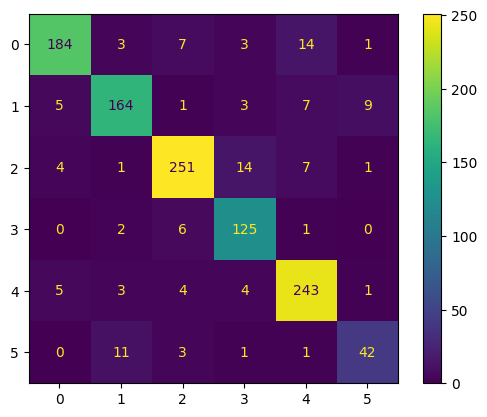

In [ ]:
print(classification_report(y1_test , y_pred_lr))
c_m_deci = confusion_matrix(y1_test , y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_deci , display_labels = y1_test)
disp.plot()

## Creating a graph for the model accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

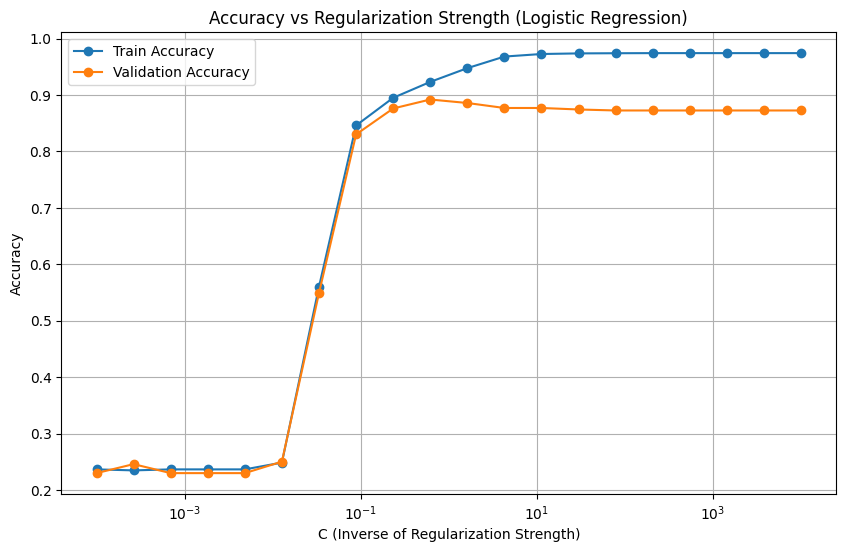

In [ ]:

# Create lists to store accuracy scores
train_scores = []
val_scores = []

# Vary the inverse of regularization strength (C parameter) for Logistic Regression
C_values = np.logspace(-4, 4, 20)  # Change the range and number of points as needed

for C in C_values:
    # Create and train the model
    model = LogisticRegression(C=C, random_state=42,penalty = 'l1',
                        solver = 'saga',
                        max_iter = 50)
    model.fit(x1_train, y1_train)

    # Calculate accuracy on training set
    train_accuracy = model.score(x1_train, y1_train)
    train_scores.append(train_accuracy)

    # Calculate accuracy on validation set
    val_accuracy = model.score(x1_test, y1_test)
    val_scores.append(val_accuracy)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Train Accuracy', marker='o')
plt.semilogx(C_values, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Strength (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


# Creating the Naive bayes model and testng it

In [ ]:
nv = MultinomialNB()
nv.fit(x1_train , y1_train )

# #accuracy
# #method 1
nv.score(x1_test , y1_test)
y_pred_nv = nv.predict(x1_test)
accuracy_score(y1_test , y_pred_nv)

0.7692307692307693

In [ ]:
print(predict_emotion(["you are a very happy"],nv))

joy


              precision    recall  f1-score   support

       anger       0.81      0.80      0.81       212
        fear       0.81      0.83      0.82       189
         joy       0.74      0.86      0.80       278
        love       0.88      0.50      0.64       134
     sadness       0.72      0.90      0.80       260
    surprise       1.00      0.03      0.07        58

    accuracy                           0.77      1131
   macro avg       0.83      0.65      0.65      1131
weighted avg       0.79      0.77      0.75      1131



ValueError: ignored

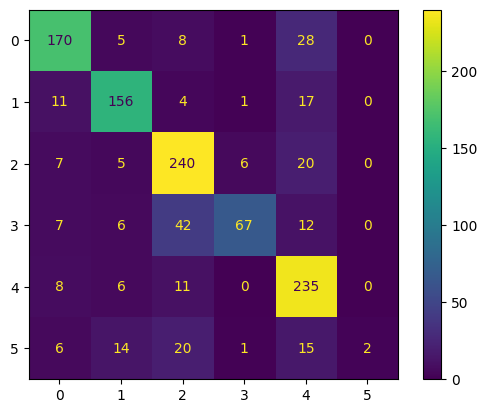

In [ ]:
print(classification_report(y1_test , y_pred_nv))
c_m_deci = confusion_matrix(y1_test , y_pred_nv)
disp = ConfusionMatrixDisplay(confusion_matrix = c_m_deci , display_labels = y1_test)
disp.plot()

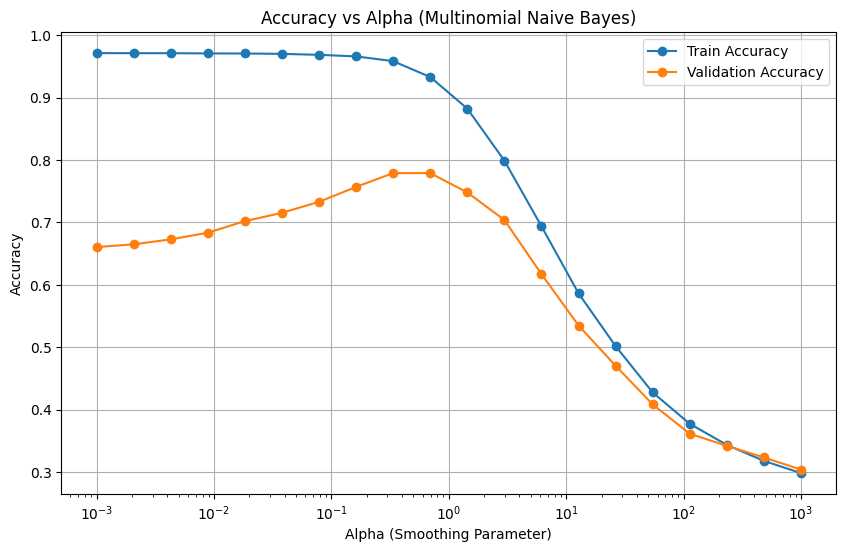

In [ ]:


# Create a list of alpha values to test
alpha_values = np.logspace(-3, 3, 20)

# Create lists to store accuracy scores
train_scores = []
val_scores = []

for alpha in alpha_values:
    # Create and train the Multinomial Naive Bayes model
    model = MultinomialNB(alpha=alpha)
    model.fit(x1_train, y1_train)

    # Make predictions
    train_predictions = model.predict(x1_train)
    val_predictions = model.predict(x1_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y1_train, train_predictions)
    val_accuracy = accuracy_score(y1_test, val_predictions)

    train_scores.append(train_accuracy)
    val_scores.append(val_accuracy)

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, train_scores, label='Train Accuracy', marker='o')
plt.semilogx(alpha_values, val_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Alpha (Smoothing Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha (Multinomial Naive Bayes)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#saving the model

import joblib

model_file = open("/content/drive/MyDrive/final_version/nlp model /emotion_classifier_rfc_model.pkl","wb")
joblib.dump(rfc , model_file)

model_file = open("/content/drive/MyDrive/final_version/nlp model /emotion_classifier_lr_model.pkl","wb")
joblib.dump(lr , model_file)

model_file = open("/content/drive/MyDrive/final_version/nlp model /emotion_classifier_nv_model.pkl","wb")
joblib.dump(nv , model_file)

model_file = open("/content/drive/MyDrive/final_version/nlp model /emotion_classifier_vc_h_model.pkl","wb")
joblib.dump(vc_h , model_file)





In [ ]:
model_file = open("/content/drive/MyDrive/final_version/nlp model /emotion_classifier_vcc_model.pkl","wb")
joblib.dump(vc_h , model_file)

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/final_version/nlp model /emotion_classifier_rfc_model.pkl')

In [ ]:
emotion_list

['joy', 'sadness', 'joy', 'sadness', 'joy', 'joy']